### 그래프 스타일 서식 지정 
- ggplot 이라는 스타일 서식 적용 
- x축 눈금 라벨을 지정하는 xticks() 함수에 size 옵션을 추가하여 폰트 크기를 바꿈
- plot() 함수에 marker = 'o' 옵션을 추가하여 원 모양의 점을 마커로 표시 
- markersize는 마커 사이즈를 변경하는 옵션 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc 
font_path = 'C:\\Users\\jswoo\\Desktop\\Repository\\Study_Data_Science\\Pandas_Data_Analytics\\Part04\\malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family = font_name)

path = 'C:\\Users\\jswoo\\Desktop\\Repository\\Study_Data_Science\\Pandas_Data_Analytics\\Part04\\시도별 전출입 인구수.xlsx'
df = pd.read_excel(path, header =0, engine='openpyxl')

df = df.fillna(method='ffill')

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별':'전입지'}, axis = 1, inplace =True)
df_seoul.set_index('전입지', inplace=True)

sr_one = df_seoul.loc['경기도']

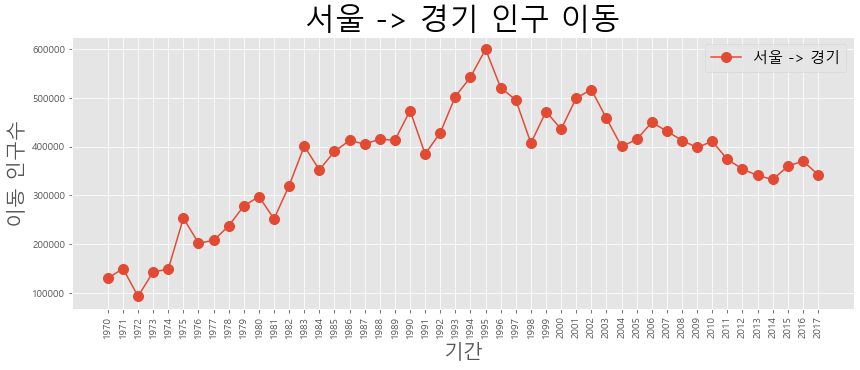

In [2]:
plt.style.use('ggplot')

plt.figure(figsize=(14,5))

plt.xticks(size = 10, rotation = 'vertical')

plt.plot(sr_one, marker = 'o', markersize = 10)

plt.title('서울 -> 경기 인구 이동', size = 30)
plt.xlabel('기간', size = 20)
plt.ylabel('이동 인구수', size = 20)

# 범례 표시
plt.legend(labels = ['서울 -> 경기'], loc = 'best', fontsize = 15)

plt.show()